In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("sample_data/HousePricePrediction.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.info() # Jumlah data tidak sama

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
data.dropna(inplace=True) # Menyamakan jumlah data dengan jumlah data terendah
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [41]:
X = data.drop(["median_house_value"], axis=1)
y = data.loc[:,["median_house_value"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [9]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17708,-121.82,37.32,10.0,2506.0,623.0,2634.0,622.0,3.1350,<1H OCEAN,231400.0
5193,-118.25,33.93,42.0,657.0,147.0,526.0,132.0,2.5000,<1H OCEAN,110200.0
6100,-117.89,34.12,35.0,1470.0,241.0,885.0,246.0,4.9239,<1H OCEAN,168800.0
15392,-116.99,33.20,17.0,2980.0,539.0,1531.0,505.0,3.1553,<1H OCEAN,250000.0
9360,-122.53,37.95,22.0,7446.0,1979.0,2980.0,1888.0,3.5838,NEAR BAY,271300.0
...,...,...,...,...,...,...,...,...,...,...
11579,-118.02,33.77,7.0,586.0,118.0,232.0,107.0,5.2077,<1H OCEAN,181300.0
298,-122.18,37.76,37.0,1575.0,358.0,933.0,320.0,2.2917,NEAR BAY,107000.0
709,-122.06,37.68,30.0,5367.0,1207.0,2667.0,1047.0,3.1796,NEAR BAY,170300.0
3934,-118.57,34.22,27.0,2795.0,606.0,1702.0,586.0,3.7798,<1H OCEAN,258400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

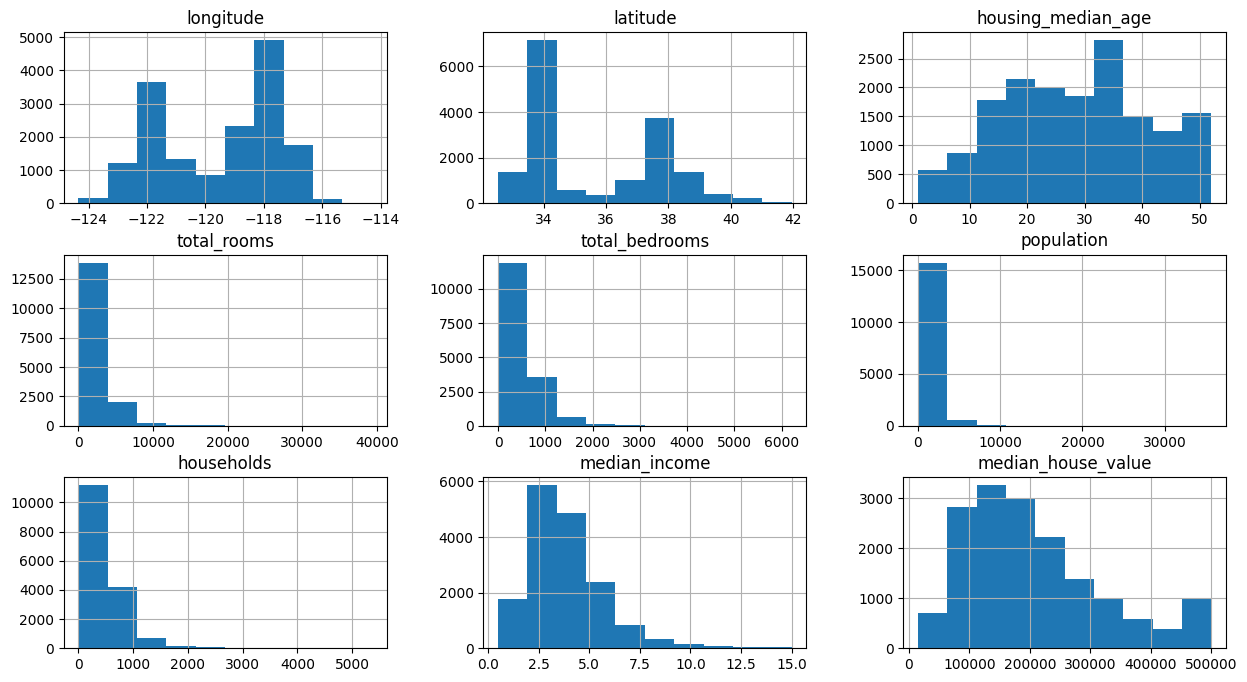

In [10]:
train_data.hist(figsize=(15,8))

<Axes: >

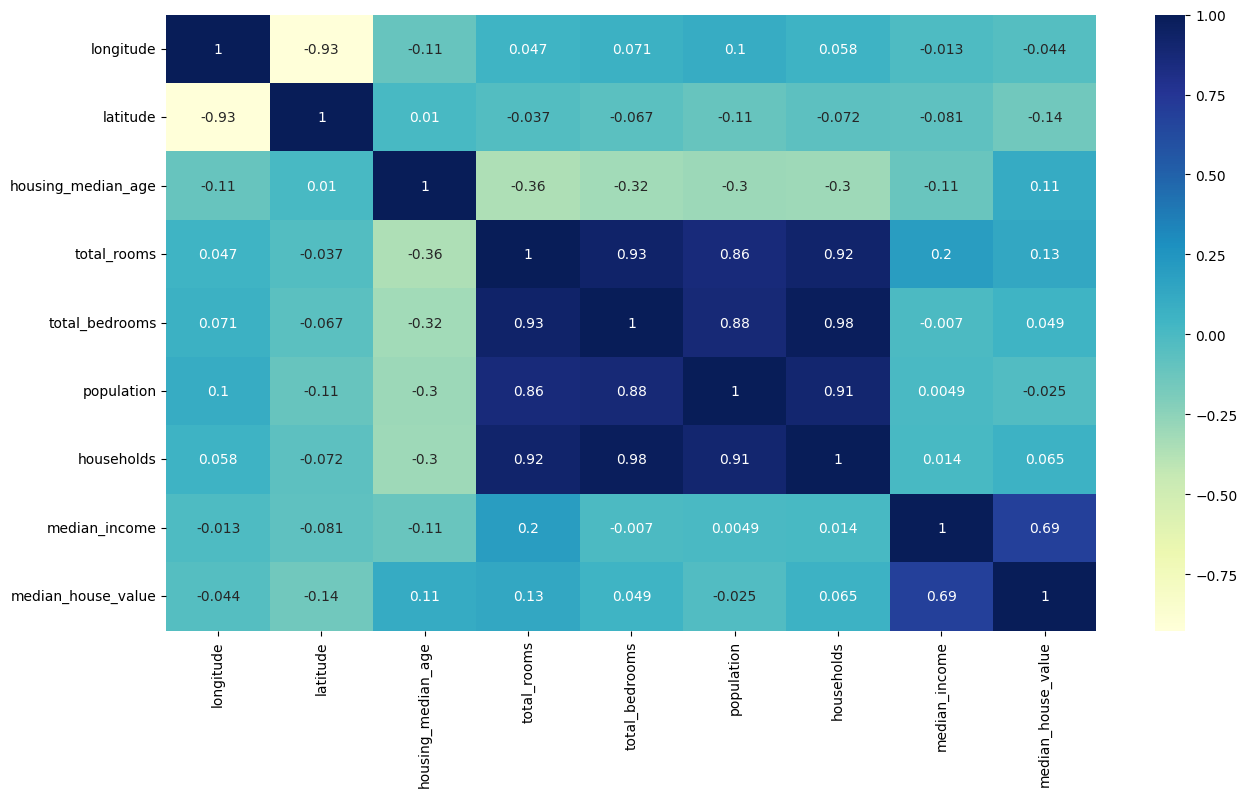

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

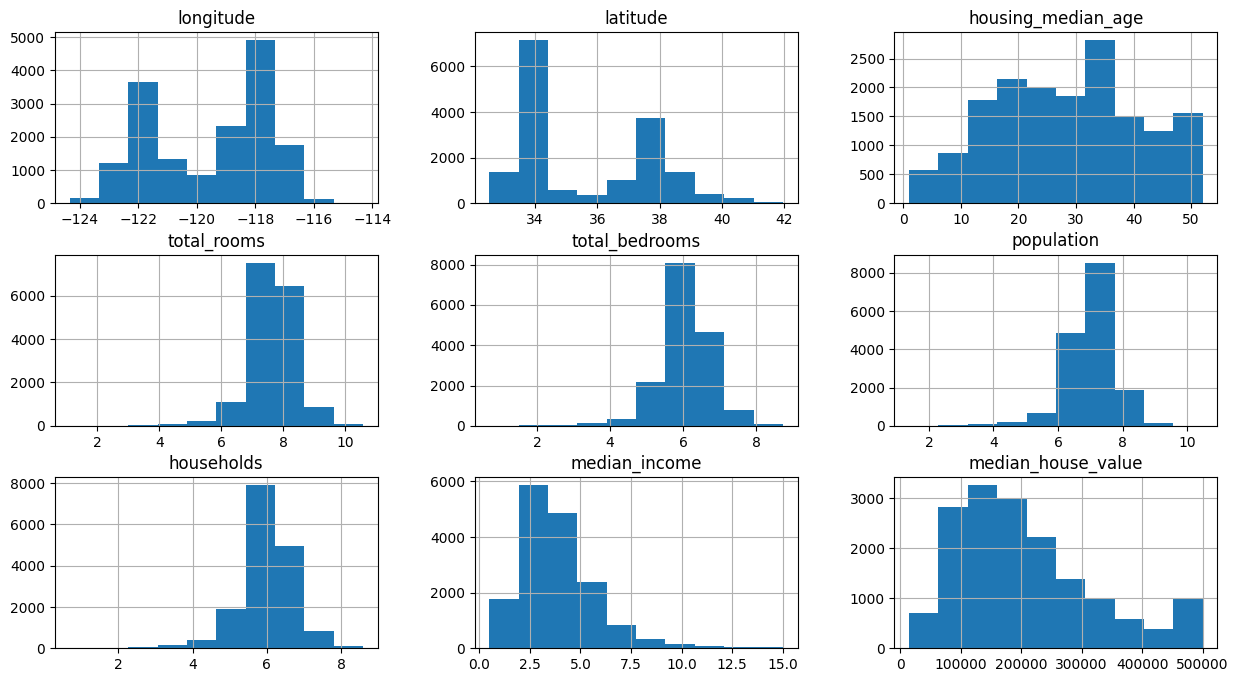

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)
train_data.hist(figsize=(15,8))

In [13]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7220
INLAND        5191
NEAR OCEAN    2106
NEAR BAY      1825
ISLAND           4
Name: ocean_proximity, dtype: int64

In [14]:
ocean = pd.get_dummies(train_data.ocean_proximity)
ocean

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17708,1,0,0,0,0
5193,1,0,0,0,0
6100,1,0,0,0,0
15392,1,0,0,0,0
9360,0,0,0,1,0
...,...,...,...,...,...
11579,1,0,0,0,0
298,0,0,0,1,0
709,0,0,0,1,0
3934,1,0,0,0,0


In [15]:
train_data = train_data.drop(["ocean_proximity"], axis=1)
train_data = train_data.join(ocean)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17708,-121.82,37.32,10.0,7.826842,6.436150,7.876638,6.434547,3.1350,231400.0,1,0,0,0,0
5193,-118.25,33.93,42.0,6.489205,4.997212,6.267201,4.890349,2.5000,110200.0,1,0,0,0,0
6100,-117.89,34.12,35.0,7.293698,5.488938,6.786717,5.509388,4.9239,168800.0,1,0,0,0,0
15392,-116.99,33.20,17.0,8.000014,6.291569,7.334329,6.226537,3.1553,250000.0,1,0,0,0,0
9360,-122.53,37.95,22.0,8.915567,7.590852,8.000014,7.543803,3.5838,271300.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11579,-118.02,33.77,7.0,6.375025,4.779123,5.451038,4.682131,5.2077,181300.0,1,0,0,0,0
298,-122.18,37.76,37.0,7.362645,5.883322,6.839476,5.771441,2.2917,107000.0,0,0,0,1,0
709,-122.06,37.68,30.0,8.588211,7.096721,7.889084,6.954639,3.1796,170300.0,0,0,0,1,0
3934,-118.57,34.22,27.0,7.935945,6.408529,7.440147,6.375025,3.7798,258400.0,1,0,0,0,0


<Axes: >

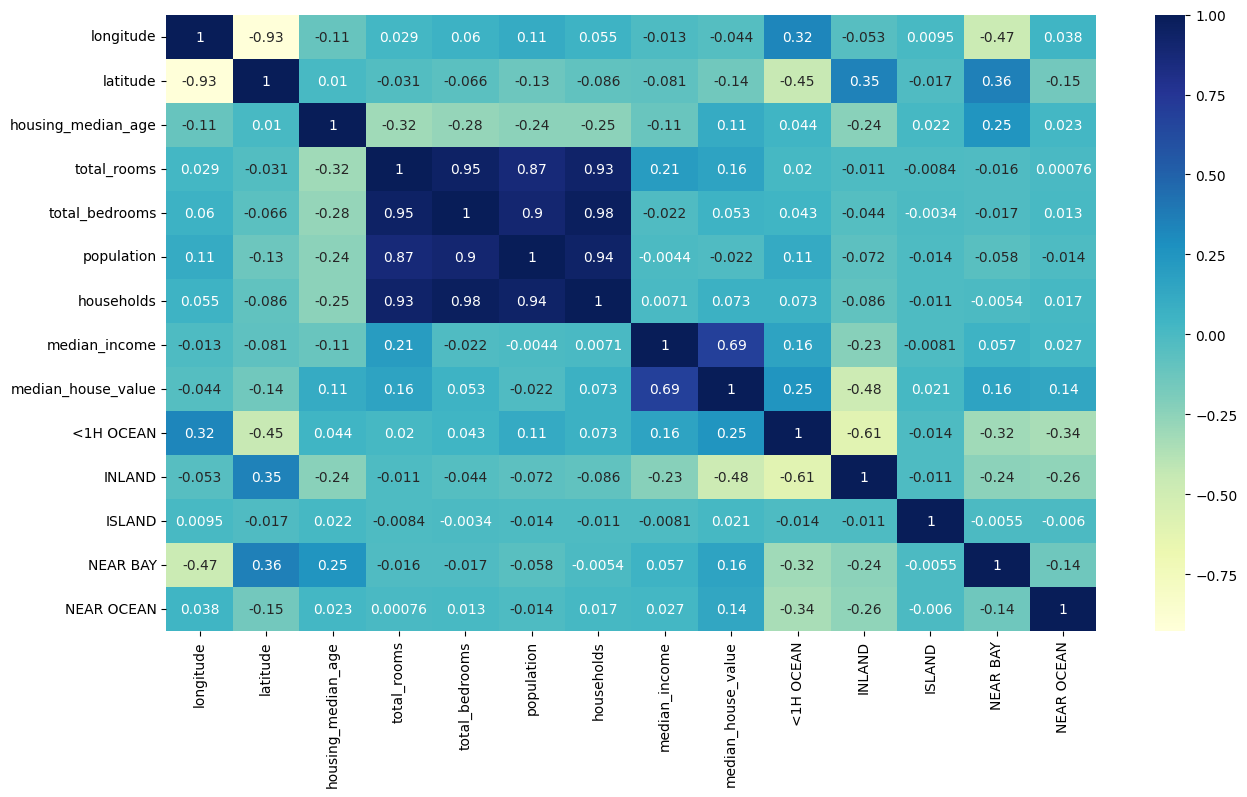

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

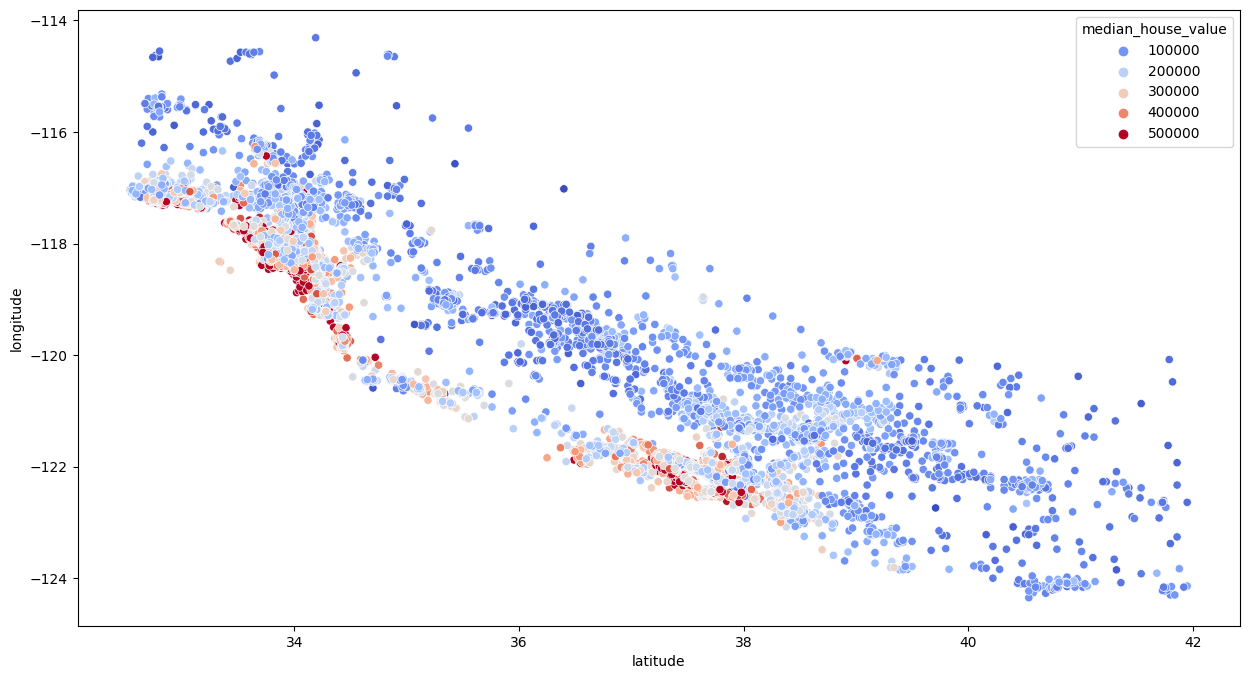

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data,  hue="median_house_value",palette="coolwarm",)

In [18]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data["households"]

<Axes: >

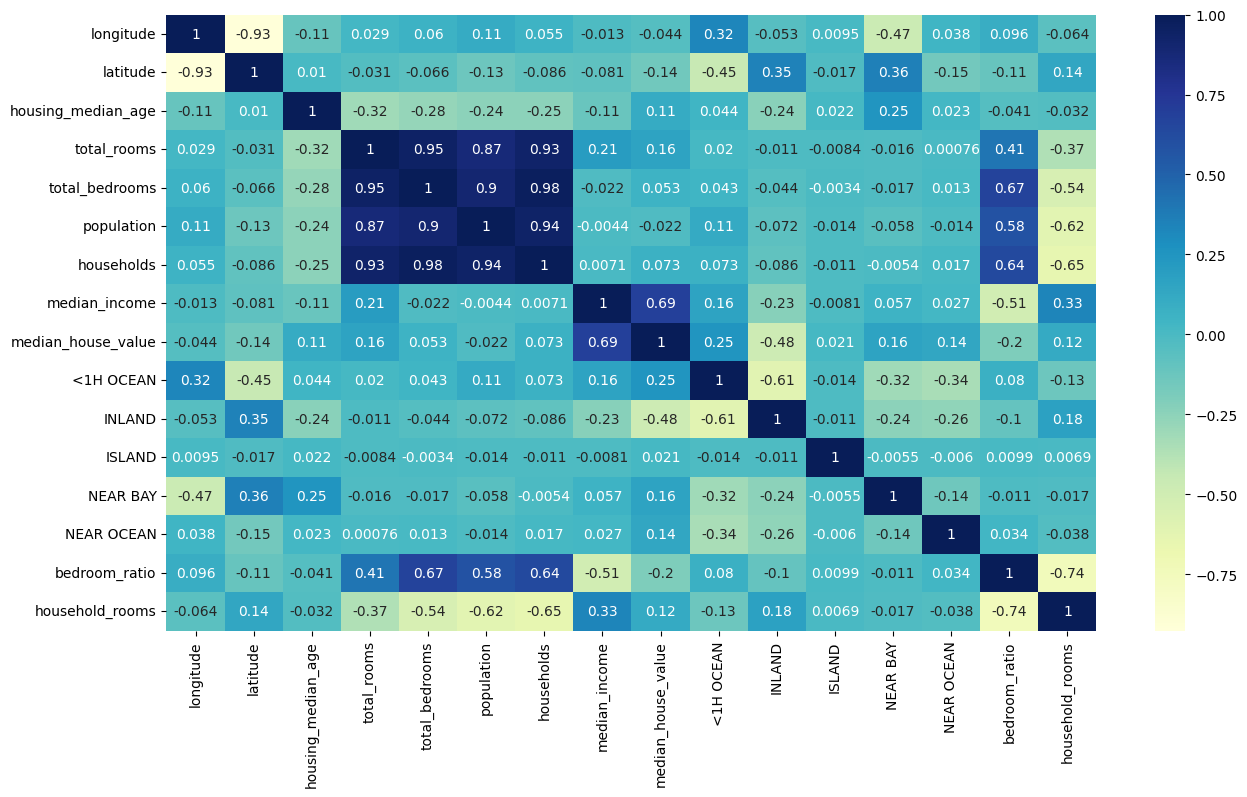

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

 

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [44]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/ test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data["households"]

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedroom_ratio,household_rooms
1925,-120.50,38.87,10.0,4.406719,3.737670,4.025352,2.833213,4.9583,INLAND,87500.0,0.848175,1.555379
16471,-121.25,38.13,25.0,7.174724,5.602119,6.672033,5.463832,3.2993,INLAND,91100.0,0.780813,1.313131
17959,-121.99,37.33,35.0,7.497207,5.676754,6.735780,5.755742,4.8365,<1H OCEAN,313900.0,0.757182,1.302561
13059,-121.28,38.60,25.0,7.023759,5.293305,6.336826,5.365976,3.1654,INLAND,111600.0,0.753628,1.308943
20553,-121.79,38.68,24.0,8.241440,6.744059,7.707962,6.762730,2.8068,INLAND,95300.0,0.818311,1.218656
...,...,...,...,...,...,...,...,...,...,...,...,...
14942,-116.99,32.74,17.0,8.039802,6.306275,7.252054,6.188264,3.1771,<1H OCEAN,189900.0,0.784382,1.299202
12321,-116.61,33.93,35.0,5.774552,4.276666,5.062595,4.127134,2.8056,INLAND,68100.0,0.740606,1.399167
15026,-117.01,32.77,34.0,8.111028,6.584791,7.373374,6.487684,2.6678,<1H OCEAN,164200.0,0.811832,1.250219
4023,-118.52,34.18,46.0,7.641564,6.084499,6.954639,5.976351,3.6534,<1H OCEAN,216000.0,0.796237,1.278634


In [49]:
test_data = test_data.join(ocean2)
test_data

ValueError: ignored

In [50]:
ocean2

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1925,0,1,0,0,0
16471,0,1,0,0,0
17959,1,0,0,0,0
13059,0,1,0,0,0
20553,0,1,0,0,0
...,...,...,...,...,...
14942,1,0,0,0,0
12321,0,1,0,0,0
15026,1,0,0,0,0
4023,1,0,0,0,0


In [35]:
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data["median_house_value"]
y_test

2494      58300.0
20262    235400.0
8666     420200.0
4187     244500.0
20543    182600.0
           ...   
13806     55500.0
4631      75000.0
7039     170800.0
8278     179700.0
13875     98200.0
Name: median_house_value, Length: 4087, dtype: float64

In [34]:
model.score(X_test,y_test)

ValueError: ignored